In [2]:
! pip install plotly

  Using cached plotly-5.9.0-py2.py3-none-any.whl (15.2 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [4]:
df = pd.read_csv('Liion_comp.csv')
df.head()

,formula_id,index,cond,log10_cond,V1,V2,V3,V4,V5,V6,...,V4492,V4493,V4494,V4495,V4496,V4497,V4498,V4499,V4500,V4501
0,In16Li8S32Sn4,1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,1.260000e-65,1.630000e-66,2.090000e-67,2.640000e-68,3.280000e-69,4.020000e-70,4.860000e-71,5.790000e-72,6.800000e-73,7.870000e-74
1,Li1O2Ti1,2,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,1.660000e-65,2.160000e-66,2.770000e-67,3.500000e-68,4.360000e-69,5.360000e-70,6.500000e-71,7.770000e-72,9.150000e-73,1.060000e-73
2,rocksalt,3,8.300000e-07,-6.080922,0.0,0.0,0.0,0.0,0.0,0.0,...,1.330000e-290,1.630000e-292,1.960000e-294,2.320000e-296,2.710000e-298,3.130000e-300,3.550000e-302,3.970000e-304,4.380000e-306,4.760000e-308
3,Br4Li2Mg1,4,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,2.240000e-66,2.860000e-67,3.610000e-68,4.480000e-69,5.480000e-70,6.600000e-71,7.850000e-72,9.190000e-73,1.060000e-73,1.210000e-74
4,Br8Li6Mg1,5,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,1.560000e-66,1.990000e-67,2.500000e-68,3.090000e-69,3.770000e-70,4.540000e-71,5.390000e-72,6.300000e-73,7.260000e-74,8.240000e-75


In [5]:
df.shape

(528, 4505)

In [7]:
df.describe()

,index,cond,log10_cond,V1,V2,V3,V4,V5,V6,V7,...,V4492,V4493,V4494,V4495,V4496,V4497,V4498,V4499,V4500,V4501
count,528.00000,8.100000e+01,81.000000,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,...,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02
mean,264.50000,4.299093e-04,-7.923143,3.295455e-94,1.087121e-92,3.484848e-91,1.083333e-89,3.276515e-88,9.583333e-87,2.727273e-85,...,5.091386e-03,4.910498e-03,4.726922e-03,4.538105e-03,4.341947e-03,4.136962e-03,3.922387e-03,3.698231e-03,3.465277e-03,3.225021e-03
std,152.56474,2.304940e-03,3.659914,7.572378e-93,2.498014e-91,8.007572e-90,2.489310e-88,7.528859e-87,2.202082e-85,6.266796e-84,...,9.372505e-03,9.353597e-03,9.349831e-03,9.332808e-03,9.280929e-03,9.179105e-03,9.018010e-03,8.793245e-03,8.504517e-03,8.154910e-03
min,1.00000,5.400000e-24,-23.267606,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,132.75000,5.000000e-10,-9.301030,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.877500e-07,5.515000e-07,3.397500e-07,2.062500e-07,1.239750e-07,7.332500e-08,4.290000e-08,2.477500e-08,1.412500e-08,7.710000e-09
50%,264.50000,5.400000e-08,-7.267606,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.606231e-03,1.527434e-03,1.349461e-03,1.171166e-03,1.012226e-03,8.886105e-04,7.800330e-04,6.908335e-04,6.061700e-04,5.059260e-04
75%,396.25000,1.000000e-06,-6.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,6.824177e-03,6.621689e-03,6.251684e-03,5.876462e-03,5.485254e-03,4.834967e-03,4.303536e-03,3.784458e-03,3.466335e-03,3.114461e-03
max,528.00000,1.700000e-02,-1.769551,1.740000e-91,5.740000e-90,1.840000e-88,5.720000e-87,1.730000e-85,5.060000e-84,1.440000e-82,...,1.174629e-01,1.211349e-01,1.237590e-01,1.252631e-01,1.256056e-01,1.247767e-01,1.227997e-01,1.197291e-01,1.156489e-01,1.106681e-01


In [10]:
df.dtypes

formula_id     object
index           int64
cond          float64
log10_cond    float64
V1            float64
               ...   
V4497         float64
V4498         float64
V4499         float64
V4500         float64
V4501         float64
Length: 4505, dtype: object

In [11]:
df.isnull().sum()

formula_id      0
index           0
cond          447
log10_cond    447
V1              0
             ... 
V4497           0
V4498           0
V4499           0
V4500           0
V4501           0
Length: 4505, dtype: int64

In [12]:
plt.style.use('fivethirtyeight')

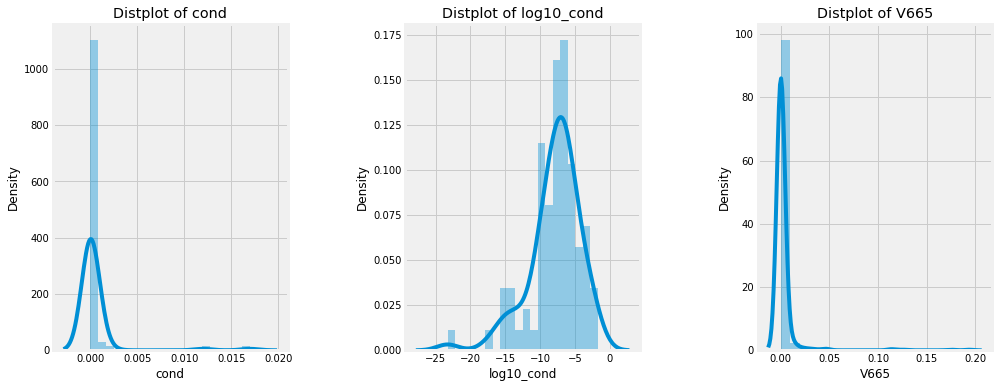

In [17]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['cond' , 'log10_cond','V665']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

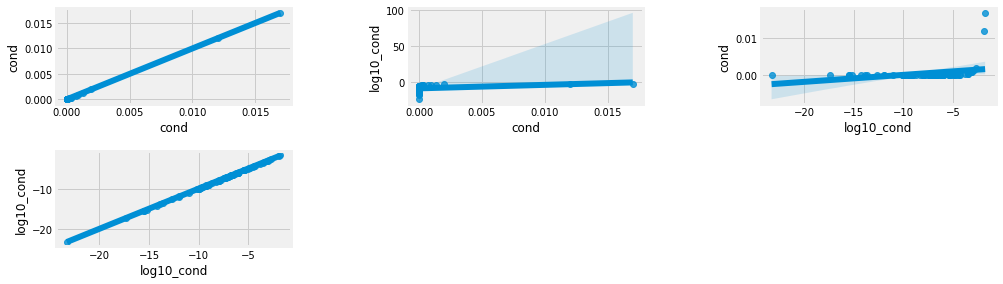

In [14]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['cond' , 'log10_cond']:
    for y in ['cond' , 'log10_cond']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()